In [4]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

num_classes = 2

predictions = Dense(num_classes, activation='softmax')(x)

for layer in base_model.layers:
    layer.trainable = False

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


batch_size = 32
epochs = 10
total_train = 2099  # Eğitim veri kümesindeki toplam görüntü sayısı

train_data_dir = r'C:\Users\semih\Desktop\brain\train'
val_data_dir = r'C:\Users\semih\Desktop\brain\test'
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)


history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
)

Found 2099 images belonging to 2 classes.
Found 602 images belonging to 2 classes.
Epoch 1/10


C:\Users\semih\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


66/66 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.7372 - loss: 0.5191 - val_accuracy: 0.8771 - val_loss: 0.2891
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.9262 - loss: 0.2018 - val_accuracy: 0.9153 - val_loss: 0.2206
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.9459 - loss: 0.1524 - val_accuracy: 0.9070 - val_loss: 0.2402
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 180s 3s/step - accuracy: 0.9652 - loss: 0.1195 - val_accuracy: 0.9319 - val_loss: 0.1939
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 177s 3s/step - accuracy: 0.9606 - loss: 0.1056 - val_accuracy: 0.9385 - val_loss: 0.1834
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 169s 3s/step - accuracy: 0.9685 - loss: 0.0953 - val_accuracy: 0.9203 - val_loss: 0.2027
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 172s 3s/step - accuracy: 0.9676 - loss: 0.0803 - val_accuracy: 0.8422 - val_loss: 0.3316
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 198s 3s/step - accuracy: 0.9779 - loss: 0.0771 - val_accuracy: 0.8372 - val_loss: 0.

In [5]:
model.save('inception_model.keras')

In [6]:
from tensorflow.keras.models import load_model
model=load_model('inception_model.keras')

C:\Users\semih\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 386 variables whereas the saved optimizer has 10 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


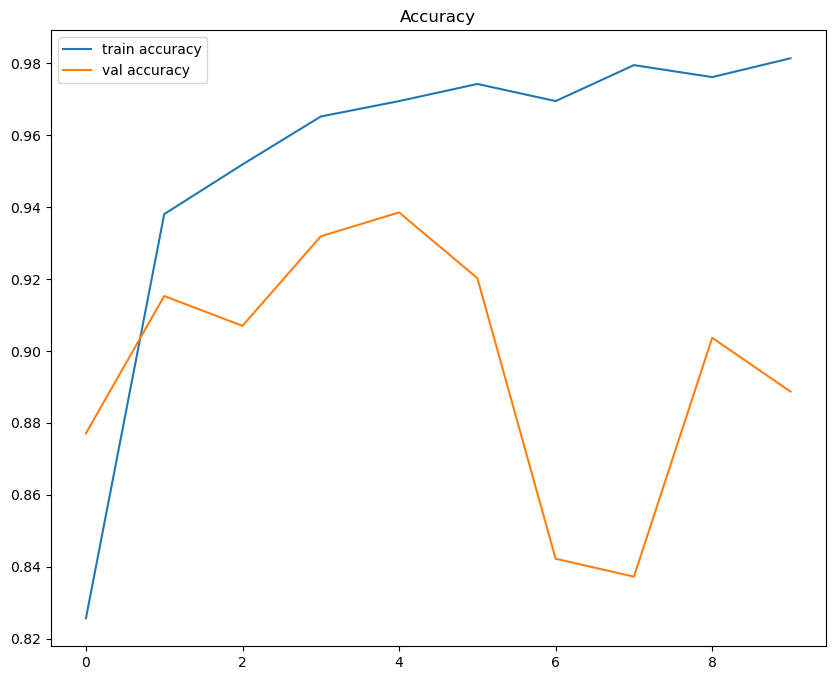

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'], label="train accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

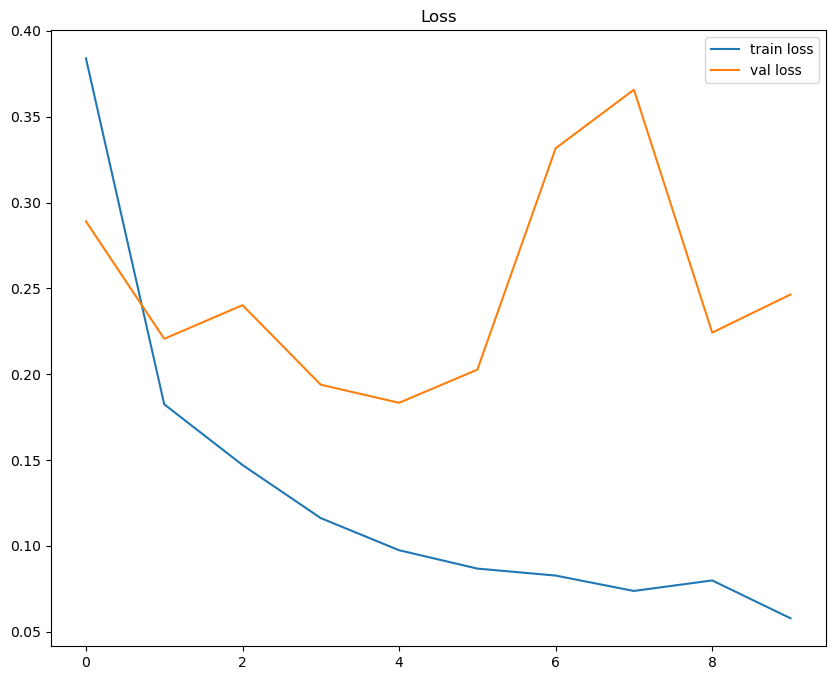

In [8]:
plt.figure(figsize=(10,8))
plt.plot(history.history["loss"], label = "train loss")
plt.plot(history.history["val_loss"], label = "val loss")
plt.legend()
plt.title("Loss")
plt.show()

In [9]:
test_data_dir = r'C:\Users\semih\Desktop\brain\val'


test_generator = val_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

evaluation = model.evaluate(
    test_generator,
    steps=len(test_generator),
    batch_size=batch_size
)


Found 300 images belonging to 2 classes.


C:\Users\semih\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8691 - loss: 0.3612


In [10]:
y_pred = model.predict(test_generator)

10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step


In [11]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import classification_report
y_true = test_generator.classes
report = classification_report(y_true, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.54      0.42      0.47       150
           1       0.52      0.64      0.58       150

    accuracy                           0.53       300
   macro avg       0.53      0.53      0.52       300
weighted avg       0.53      0.53      0.52       300



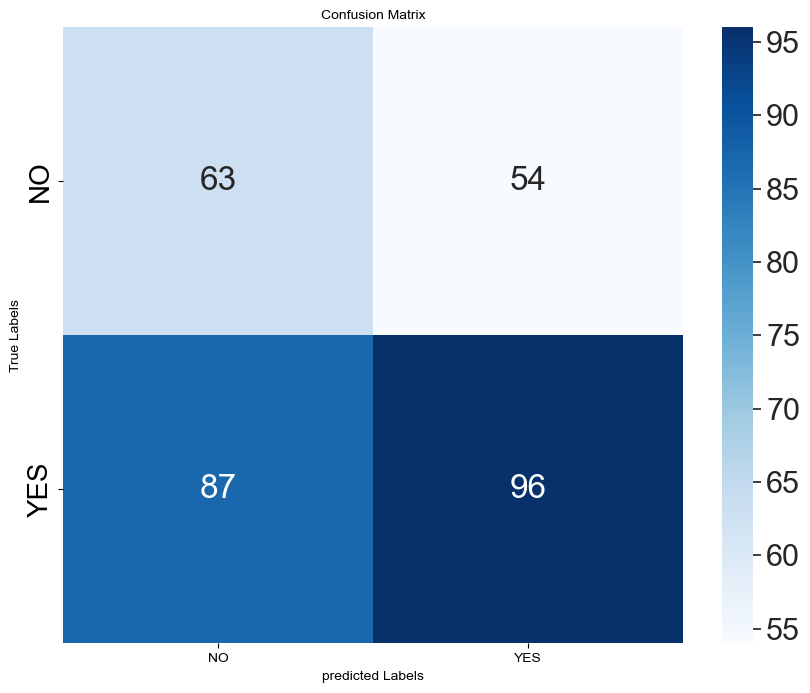

In [13]:
import seaborn as sns
cm = confusion_matrix(y_pred,y_true)
plt.figure(figsize=(10,8))
ax=plt.subplot()
sns.set(font_scale=2.0)
sns.heatmap(cm, annot=True , fmt="g" , cmap="Blues" , ax=ax);
ax.set_xlabel("predicted Labels" , fontsize=10); ax.set_ylabel("True Labels", fontsize=10);
ax.set_title('Confusion Matrix', fontsize = 10);
ax.xaxis.set_ticklabels(["NO" , "YES"], fontsize=10); ax.yaxis.set_ticklabels(["NO" , "YES"], fontsize=20);